# Imports

In [1]:
# from dataclasses import dataclass, field
from io import StringIO
# from functools import lru_cache
# from typing import List
import numpy as np
# from scipy.integrate import quad
# import pandas as pd
# from tqdm.auto import tqdm

In [2]:
# spectrum dataclass
from src.spectrum import Spectrum

In [3]:
# plotting
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt

In [4]:
!python -V

Python 3.9.8


# Testing data

In [5]:
yfy_str = """
1 1
2 1
3 1
4 1
"""

In [6]:
yfy_data = np.genfromtxt(StringIO(yfy_str))
yfy_data

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.]])

In [11]:
s = Spectrum(bin_centers=yfy_data[:,0], bin_values_fy=yfy_data[:,1])
print(s)

bin_centers:
[1. 2. 3. 4.]

bin_values_fy:
[1. 1. 1. 1.]

bin_values_yfy:
[1. 2. 3. 4.]

bin_values_ydy:
[0.4 1.6 3.6 6.4]

bin_values_dy:
[0.4 0.8 1.2 1.6]

bin_values_fy_normalized:
[0.25 0.25 0.25 0.25]

bin_values_yfy_normalized:
[0.25 0.5  0.75 1.  ]

bin_values_dy_normalized:
[0.1 0.2 0.3 0.4]

bin_values_ydy_normalized:
[0.1 0.4 0.9 1.6]




In [8]:
s.yF

2.5

## Plots

Text(0, 0.5, 'ydy')

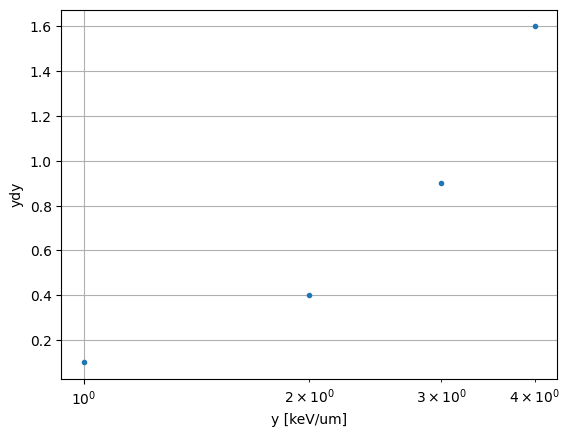

In [9]:
plt.plot(s.y, s.ydy_norm, '.')
plt.xscale('log')
plt.grid()
plt.xlabel('y [keV/um]')
plt.ylabel('ydy')

Text(0, 0.5, 'yfy')

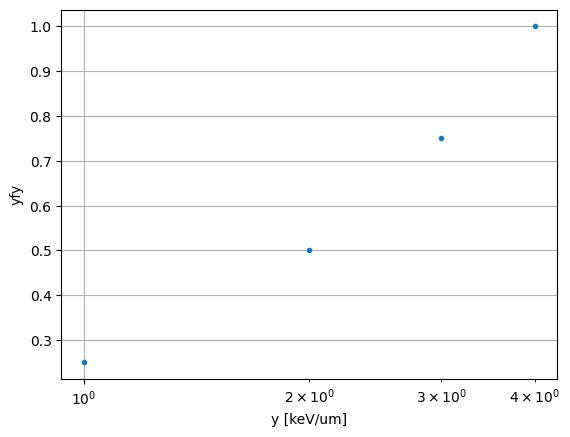

In [10]:
plt.plot(s.y, s.yfy_norm, '.')
plt.xscale('log')
plt.grid()
plt.xlabel('y [keV/um]')
plt.ylabel('yfy')